In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox

import warnings
warnings.filterwarnings('ignore')

In [41]:
#importing Database
df=pd.read_csv("/content/delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [42]:
# EDA & Data visualizationm
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<Axes: xlabel='Delivery Time', ylabel='Density'>

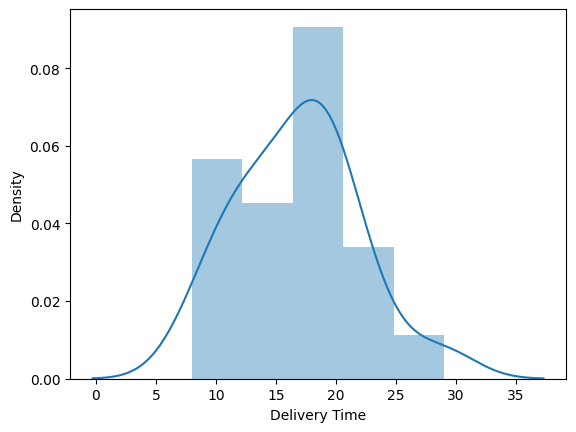

In [43]:
sns.distplot(df["Delivery Time"])

<Axes: xlabel='Sorting Time', ylabel='Density'>

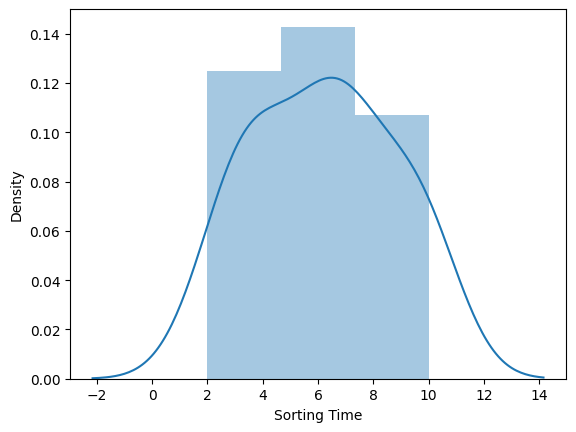

In [44]:
sns.distplot(df["Sorting Time"])

In [45]:
#Feature Engineering - Renaming The columns
df=df.rename({"Delivery Time":"delivery_time", "Sorting Time":"sorting_time"}, axis=1)
df

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [46]:
#correlation Analysis for the dataset
df.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


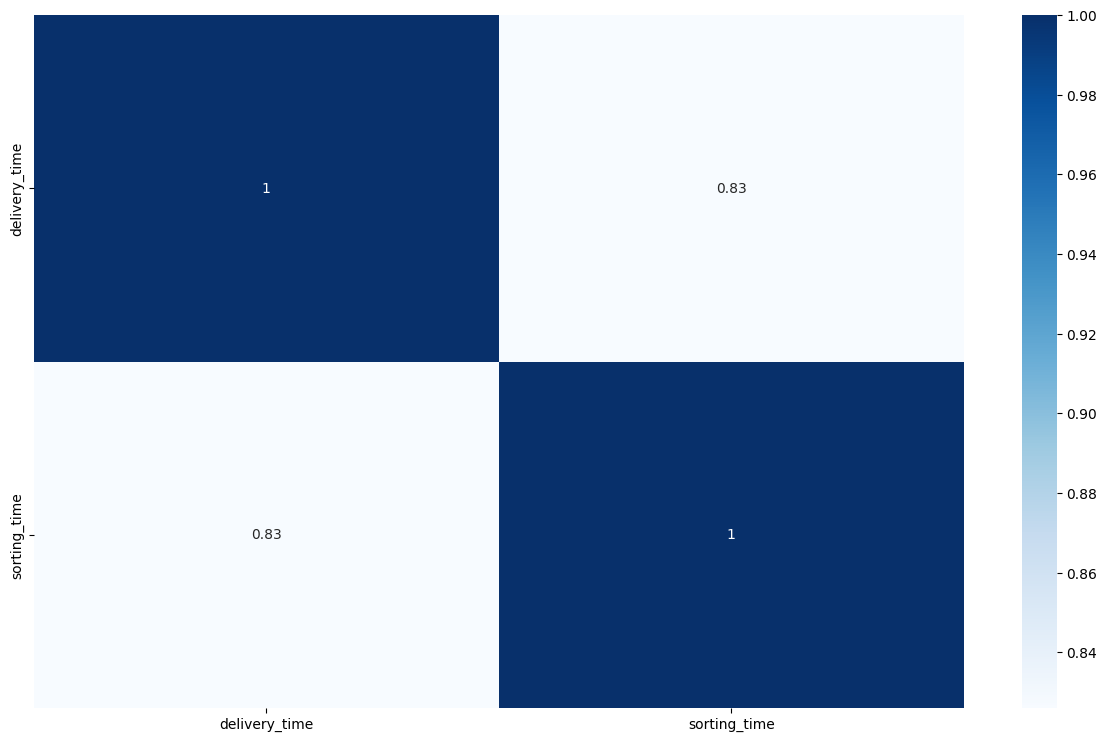

In [47]:
corr_matrx = df.corr()              #Correation analysis using heat map

plt.figure(figsize=(15,9))
sns.heatmap(corr_matrx,annot=True,cmap='Blues')
plt.show()



<Axes: xlabel='sorting_time', ylabel='delivery_time'>

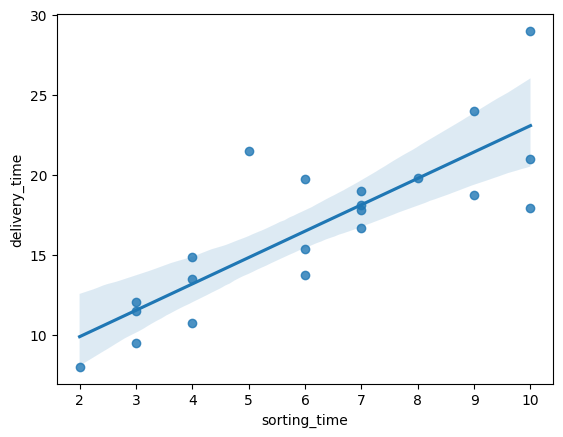

In [48]:
sns.regplot(x=df["sorting_time"], y=df["delivery_time"])

In [49]:
#Building the model
model=smf.ols("delivery_time~sorting_time",data=df).fit()

In [50]:
# Testing The Model and finding the coefficent parameter
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [51]:
#finding tvalues and pvalues
model.tvalues, model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [52]:
#To finding the Rsquared values
model.rsquared, model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [53]:
#Model pridiction
# Manual prediction for say sorting time 6
delivery_time = (5.277634) + (1.903420)*(6)
delivery_time

16.698154

In [54]:
# Automatic Prediction for say sorting time 6, 9
new_data=pd.Series([6,9])
new_data

0    6
1    9
dtype: int64

In [55]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,6
1,9


In [56]:
model.predict(data_pred)

0    16.476853
1    21.423913
dtype: float64

# LOG Transformation

In [57]:
df['log_delivery_time'] = np.log(df['delivery_time'])
df

,delivery_time,sorting_time,log_delivery_time
0,21.00,10,3.044522
1,13.50,4,2.602690
2,19.75,6,2.983153
3,24.00,9,3.178054
4,29.00,10,3.367296
5,15.35,6,2.731115
6,19.00,7,2.944439
7,9.50,3,2.251292
8,17.90,10,2.884801
9,18.75,9,2.931194


In [58]:
model_log = smf.ols('log_delivery_time~sorting_time',data=df).fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      log_delivery_time   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           1.59e-06
Time:                        04:55:51   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
print(model_log.rsquared)
print(model_log.rsquared_adj)

0.7109478980584187
0.6957346295351776


# SQR Root Transformation

In [60]:
df['sqrt_delivery_time'] = np.sqrt(df['delivery_time'])
df

,delivery_time,sorting_time,log_delivery_time,sqrt_delivery_time
0,21.00,10,3.044522,4.582576
1,13.50,4,2.602690,3.674235
2,19.75,6,2.983153,4.444097
3,24.00,9,3.178054,4.898979
4,29.00,10,3.367296,5.385165
5,15.35,6,2.731115,3.917908
6,19.00,7,2.944439,4.358899
7,9.50,3,2.251292,3.082207
8,17.90,10,2.884801,4.230839
9,18.75,9,2.931194,4.330127


In [61]:
model_sqrt = smf.ols('sqrt_delivery_time~sorting_time',data=df).fit()
model_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     sqrt_delivery_time   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     45.20
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           2.00e-06
Time:                        04:58:31   Log-Likelihood:                -6.6646
No. Observations:                  21   AIC:                             17.33
Df Residuals:                      19   BIC:                             19.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.7727      0.205     13.527      0.000       2.344       3.202
sorting_time     0.2066      0.031      6.723      0.000       0.142       0.271
==============================================================================
Omnibus:                        2.228   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                1.195
Skew:                           0.580   Prob(JB):                        0.550
Kurtosis:                       3.142   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Cube Root Transformation

In [62]:
df["cbrt_delivery_time"] = df["delivery_time"].apply(lambda x: x**(1/3))
df

,delivery_time,sorting_time,log_delivery_time,sqrt_delivery_time,cbrt_delivery_time
0,21.00,10,3.044522,4.582576,2.758924
1,13.50,4,2.602690,3.674235,2.381102
2,19.75,6,2.983153,4.444097,2.703060
3,24.00,9,3.178054,4.898979,2.884499
4,29.00,10,3.367296,5.385165,3.072317
5,15.35,6,2.731115,3.917908,2.485246
6,19.00,7,2.944439,4.358899,2.668402
7,9.50,3,2.251292,3.082207,2.117912
8,17.90,10,2.884801,4.230839,2.615879
9,18.75,9,2.931194,4.330127,2.656646


In [63]:
model_cbrt = smf.ols('cbrt_delivery_time~sorting_time',data=df).fit()
model_cbrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     cbrt_delivery_time   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     46.08
Date:                Thu, 14 Sep 2023   Prob (F-statistic):           1.75e-06
Time:                        05:04:25   Log-Likelihood:                 11.651
No. Observations:                  21   AIC:                            -19.30
Df Residuals:                      19   BIC:                            -17.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.9951      0.086     23.283      0.000       1.816       2.174
sorting_time     0.0872      0.013      6.788      0.000       0.060       0.114
==============================================================================
Omnibus:                        1.873   Durbin-Watson:                   1.274
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                0.966
Skew:                           0.523   Prob(JB):                        0.617
Kurtosis:                       3.106   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# BoxCox

In [64]:
transformed_data_1, best_lambda_1 = boxcox(df['delivery_time'])
transformed_data_2, best_lambda_2 = boxcox(df["sorting_time"])

In [65]:
print("Lambda X: ",best_lambda_1)
print("Lambda Y: ",best_lambda_2)
X=transformed_data_1
Y=transformed_data_2
m=len(X)

Lambda X:  0.5456600682172689
Lambda Y:  0.6985665334706025


In [67]:
print(X)
print(Y)

[7.81808568 5.75061513 7.50026679 8.54751575 9.67668655 6.30108821
 7.3051773  4.42747572 7.01259874 7.23937278 7.52087608 4.8642946
 6.67837315 5.11533276 5.28826959 6.16423431 5.82692305 7.06907237
 3.86713559 6.99370738 7.9427966 ]
[5.71936506 2.33875613 3.57325009 5.21195379 5.71936506 3.57325009
 4.14227211 1.65234655 5.71936506 5.21195379 4.68721834 2.33875613
 4.14227211 1.65234655 1.65234655 2.33875613 3.57325009 4.14227211
 0.89167095 4.14227211 2.97474857]


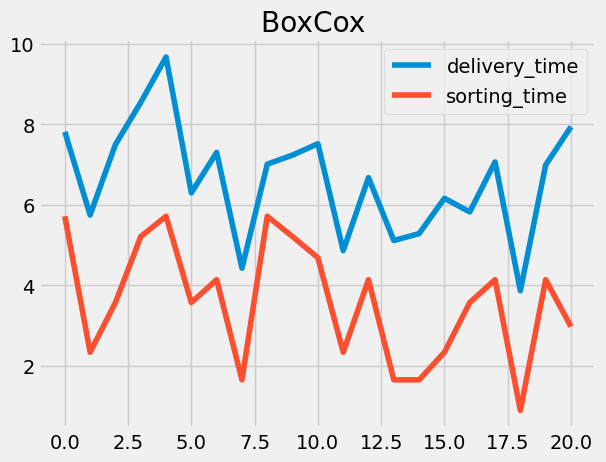

In [68]:
plt.style.use('fivethirtyeight')
plt.plot(X,label="delivery_time")
plt.plot(Y,label="sorting_time")
plt.title("BoxCox ")

plt.legend()